In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

# 그래프의 폰트 출력을 선명하게 (svg, retina 등이 있음)
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
# 테마 설정: "default", "classic", "dark_background", "fivethirtyeight", "seaborn"
mpl.style.use("default")
# 이미지가 레이아웃 안으로 들어오도록 함
# https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html
mpl.rcParams.update({"figure.constrained_layout.use": True})

#font, line, marker 등의 배율 설정: paper, notebook, talk, poster
sns.set_context("paper") 
#배색 설정: tab10, Set2, Accent, husl
sns.set_palette("Set2") 
#눈금, 배경, 격자 설정: ticks, white, whitegrid, dark, darkgrid
# withegrid: 눈금을 그리고, 각 축의 눈금을 제거
sns.set_style("whitegrid") 

In [2]:
# 로컬에서 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [3]:
import os, natsort, re
from tqdm import tqdm
import time, random

In [4]:
PRJCT_PATH = 'C:\\Users\junsung\KDH_AI_DEV\project2\\aladin\\aladin_usedbook'
save_dir = 'processed/usedbook_data/concatted'
date = 240711
file_name = f'usedproduct_unused_filtered_{date}_concatted.csv'

In [5]:
file_path = os.path.join(PRJCT_PATH,save_dir,file_name)
usedbook_data = pd.read_csv(file_path)
usedbook_data

,ItemId,used_idx,delivery_fee,price,quality,store,url
0,1000152,1,2500,7300,중,중고매장인천청라점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
1,1000152,10,2500,7400,중,중고매장범계점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
2,1000152,11,2500,7400,중,중고매장부산서면역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
3,1000152,12,2500,7700,상,중고매장동대구역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
4,1000152,13,2500,7700,상,중고매장범계점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
...,...,...,...,...,...,...,...
70234,999466,5,2500,5000,중,중고매장수유점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
70235,999466,6,2500,5000,중,중고매장광주충장로점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
70236,999466,7,2500,5000,중,중고매장연신내점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
70237,999466,8,2500,5000,중,중고매장평택점,https://www.aladin.co.kr/shop/wproduct.aspx?It...


In [40]:
display(usedbook_data[usedbook_data['ItemId']==  2696468])

,ItemId,used_idx,delivery_fee,price,quality,store,url
9879,2696468,1,2500,52200,중,중고매장수유점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
9880,2696468,2,2500,75600,중,중고매장동대구역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
9881,2696468,3,2500,75700,중,중고매장강서홈플러스점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
9882,2696468,4,2500,75700,중,중고매장부산센텀점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
9883,2696468,5,2500,78900,상,중고매장분당서현점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
9884,2696468,6,2500,79000,상,중고매장천호점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
9885,2696468,7,2500,79400,중,중고매장광주상무점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
9886,2696468,8,2500,82200,최상,중고매장수원시청역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
9887,2696468,9,2500,82900,상,중고매장분당야탑점,https://www.aladin.co.kr/shop/wproduct.aspx?It...


- quality와 itemid가 같지만 가격이 다른경우 확인

In [6]:
cond4 = usedbook_data[['ItemId','quality','price']].duplicated(keep=False)
cond5 = usedbook_data[['ItemId','quality']].duplicated(keep=False)
samples = usedbook_data.loc[(~cond4) & cond5]
samples

,ItemId,used_idx,delivery_fee,price,quality,store,url
0,1000152,1,2500,7300,중,중고매장인천청라점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
6,1000152,15,2500,7700,중,중고매장인천청라점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
26,101158454,6,2500,9000,상,중고매장동대구역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
45,1030987,1,2500,5200,중,중고매장마산합성점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
48,1030987,12,2500,6200,상,중고매장부산서면동보점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
...,...,...,...,...,...,...,...
70200,964118,4,2500,5800,중,중고매장청주점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
70201,964118,5,2500,6200,중,중고매장청주점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
70210,99386523,10,2500,11600,상,중고매장인천구월점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
70218,99386523,4,2500,11400,상,중고매장동탄2하나로마트점,https://www.aladin.co.kr/shop/wproduct.aspx?It...


In [43]:
# 'ItemId' 기준으로 그룹화하여 price의 중간값 계산
median_price = samples.groupby(['ItemId', 'quality'])['price'].median().reset_index()
median_price.rename(columns={'price': 'median_price'}, inplace=True)

# 원본 데이터프레임과 병합하여 중간값 적용
merged_df = pd.merge(samples, median_price, on=['ItemId', 'quality'])

# Calculate the difference between the original price and the median price
merged_df['price_median_diff'] = merged_df['price'] - merged_df['median_price']



std_deviation = samples.groupby(['ItemId', 'quality'])['price'].std().reset_index()
std_deviation.rename(columns={'price': 'std_deviation'}, inplace=True)


merged_df = pd.merge(merged_df, std_deviation, on=['ItemId', 'quality'])

price_diff_counts = merged_df['price_median_diff'].unique()
print('price_diff의 unique 값 개수:\n', price_diff_counts)
merged_df


price_diff의 unique 값 개수:
 [  -200.    200.      0.   -450.    300.    450.   -100.   -600.    600.
    -50.     50.    550.  -2600.   -550.   -850.    850.  -4400.   -150.
    400.    150.   -400.   -250.    650.  -1050.   1250.    500.  -1400.
   -300.    100.   -700.    350.  -1700.   1700.    250.    700.   -500.
   -800.   -900.   -350.  -1950.   1950.    750.   -750.  -2650.   2650.
   -950.    950.  -1500.  -1000.    800.   2200.   -650.   1000.   1050.
  -2500.   1500.  -3200.  -1100.  -1300.  -2150.  -4500.   2150.  -1200.
    900.  -2000.   2000.  -1900.   1600.  -2200.   1400.  -1800.   1200.
  -1650.   1650.   1150.  -1150.   1300.   1450.   1100.  -2050.   2050.
   1800.   1750.   2100.  -2100.  -1250.  -3250.   3250.  -2700.   2700.
  -3700.  -5200.  -9350.  -1550.   1550. -23400.   3800.   3900.  -5500.
  -3800.  -1600.  -2900.  -3950.   2550.  -3900.   1350.  -1350.  -2750.
  -2400.   2800.   2750.   2600.  -3050.   2350.   1900.  -1850.   1850.
   2850.   2400.  -3600. 

,ItemId,used_idx,delivery_fee,price,quality,store,url,median_price,price_median_diff,std_deviation
0,1000152,1,2500,7300,중,중고매장인천청라점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,7500.0,-200.0,282.842712
1,1000152,15,2500,7700,중,중고매장인천청라점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,7500.0,200.0,282.842712
2,101158454,6,2500,9000,상,중고매장동대구역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,9000.0,0.0,NaN
3,1030987,1,2500,5200,중,중고매장마산합성점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,5200.0,0.0,NaN
4,1030987,12,2500,6200,상,중고매장부산서면동보점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,6200.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
13765,964118,4,2500,5800,중,중고매장청주점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,6200.0,-400.0,611.010093
13766,964118,5,2500,6200,중,중고매장청주점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,6200.0,0.0,611.010093
13767,99386523,10,2500,11600,상,중고매장인천구월점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,11500.0,100.0,141.421356
13768,99386523,4,2500,11400,상,중고매장동탄2하나로마트점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,11500.0,-100.0,141.421356


- 표준편차 std_deviation이 NaN이 나오는 경우는 해당하는 아이템아이디,퀄리티의 데이터가 하나인경우 표준편차를 구할수 없어 NaN이 나오는거임
- NaN이 나오는 경우 0으로 대입

In [47]:
display(merged_df[merged_df['ItemId']==  101158454])

,ItemId,used_idx,delivery_fee,price,quality,store,url,median_price,price_median_diff,std_deviation
2,101158454,6,2500,9000,상,중고매장동대구역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,9000.0,0.0,NaN


In [51]:
# 'price' 열에서 NaN 값을 계산 후 0으로 대체
merged_df['std_deviation'].fillna(0, inplace=True)

C:\Users\junsung\AppData\Local\Temp\ipykernel_24284\1074738985.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['std_deviation'].fillna(0, inplace=True)


In [52]:
merged_df

,ItemId,used_idx,delivery_fee,price,quality,store,url,median_price,price_median_diff,std_deviation
0,1000152,1,2500,7300,중,중고매장인천청라점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,7500.0,-200.0,282.842712
1,1000152,15,2500,7700,중,중고매장인천청라점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,7500.0,200.0,282.842712
2,101158454,6,2500,9000,상,중고매장동대구역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,9000.0,0.0,0.000000
3,1030987,1,2500,5200,중,중고매장마산합성점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,5200.0,0.0,0.000000
4,1030987,12,2500,6200,상,중고매장부산서면동보점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,6200.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
13765,964118,4,2500,5800,중,중고매장청주점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,6200.0,-400.0,611.010093
13766,964118,5,2500,6200,중,중고매장청주점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,6200.0,0.0,611.010093
13767,99386523,10,2500,11600,상,중고매장인천구월점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,11500.0,100.0,141.421356
13768,99386523,4,2500,11400,상,중고매장동탄2하나로마트점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,11500.0,-100.0,141.421356


In [53]:
display(merged_df[merged_df['ItemId']==  2696468])
print(merged_df[merged_df['ItemId']== 2696468]['url'].iloc[0])

,ItemId,used_idx,delivery_fee,price,quality,store,url,median_price,price_median_diff,std_deviation
1887,2696468,1,2500,52200,중,중고매장수유점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,75600.0,-23400.0,14730.014709
1888,2696468,2,2500,75600,중,중고매장동대구역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,75600.0,0.0,14730.014709
1889,2696468,5,2500,78900,상,중고매장분당서현점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,79000.0,-100.0,2281.081615
1890,2696468,6,2500,79000,상,중고매장천호점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,79000.0,0.0,2281.081615
1891,2696468,7,2500,79400,중,중고매장광주상무점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,75600.0,3800.0,14730.014709
1892,2696468,9,2500,82900,상,중고매장분당야탑점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,79000.0,3900.0,2281.081615


https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=341638367


- 중간값과 차이나는 정도를 알고싶어 표준편차를 구해본거 였는데 생각을 잘못 한것 같음
- 따라서 퀄리티별 중간값과 원본값의 절대 차이를 계산후 min_max 스케일링을 이용해 나타내보기로 함

In [54]:
from sklearn.preprocessing import MinMaxScaler

merged_df['price_diff'] = abs(merged_df['price'] - merged_df['median_price'])

# Min-Max 스케일링 함수 정의
def min_max_scale(x):
    return (x - x.min()) / (x.max() - x.min())

# 'price_diff'를 0에서 1 사이로 스케일링
merged_df['scaled_price_diff'] = min_max_scale(merged_df['price_diff'])

display(merged_df)

,ItemId,used_idx,delivery_fee,price,quality,store,url,median_price,price_median_diff,std_deviation,price_diff,scaled_price_diff
0,1000152,1,2500,7300,중,중고매장인천청라점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,7500.0,-200.0,282.842712,200.0,0.008547
1,1000152,15,2500,7700,중,중고매장인천청라점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,7500.0,200.0,282.842712,200.0,0.008547
2,101158454,6,2500,9000,상,중고매장동대구역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,9000.0,0.0,0.000000,0.0,0.000000
3,1030987,1,2500,5200,중,중고매장마산합성점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,5200.0,0.0,0.000000,0.0,0.000000
4,1030987,12,2500,6200,상,중고매장부산서면동보점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,6200.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
13765,964118,4,2500,5800,중,중고매장청주점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,6200.0,-400.0,611.010093,400.0,0.017094
13766,964118,5,2500,6200,중,중고매장청주점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,6200.0,0.0,611.010093,0.0,0.000000
13767,99386523,10,2500,11600,상,중고매장인천구월점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,11500.0,100.0,141.421356,100.0,0.004274
13768,99386523,4,2500,11400,상,중고매장동탄2하나로마트점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,11500.0,-100.0,141.421356,100.0,0.004274


In [59]:
merged_df[merged_df['scaled_price_diff']>0.4] # min_max 스케일링으로 0.5 보다 작으면 중앙값과 편차가 상대적으로 작다는것을 나타냄

,ItemId,used_idx,delivery_fee,price,quality,store,url,median_price,price_median_diff,std_deviation,price_diff,scaled_price_diff
1887,2696468,1,2500,52200,중,중고매장수유점,https://www.aladin.co.kr/shop/wproduct.aspx?It...,75600.0,-23400.0,14730.014709,23400.0,1.0


- 1개의 데이터를 제외하고 중앙값과 거의 유사하게 나타내는것을 알수 있었음

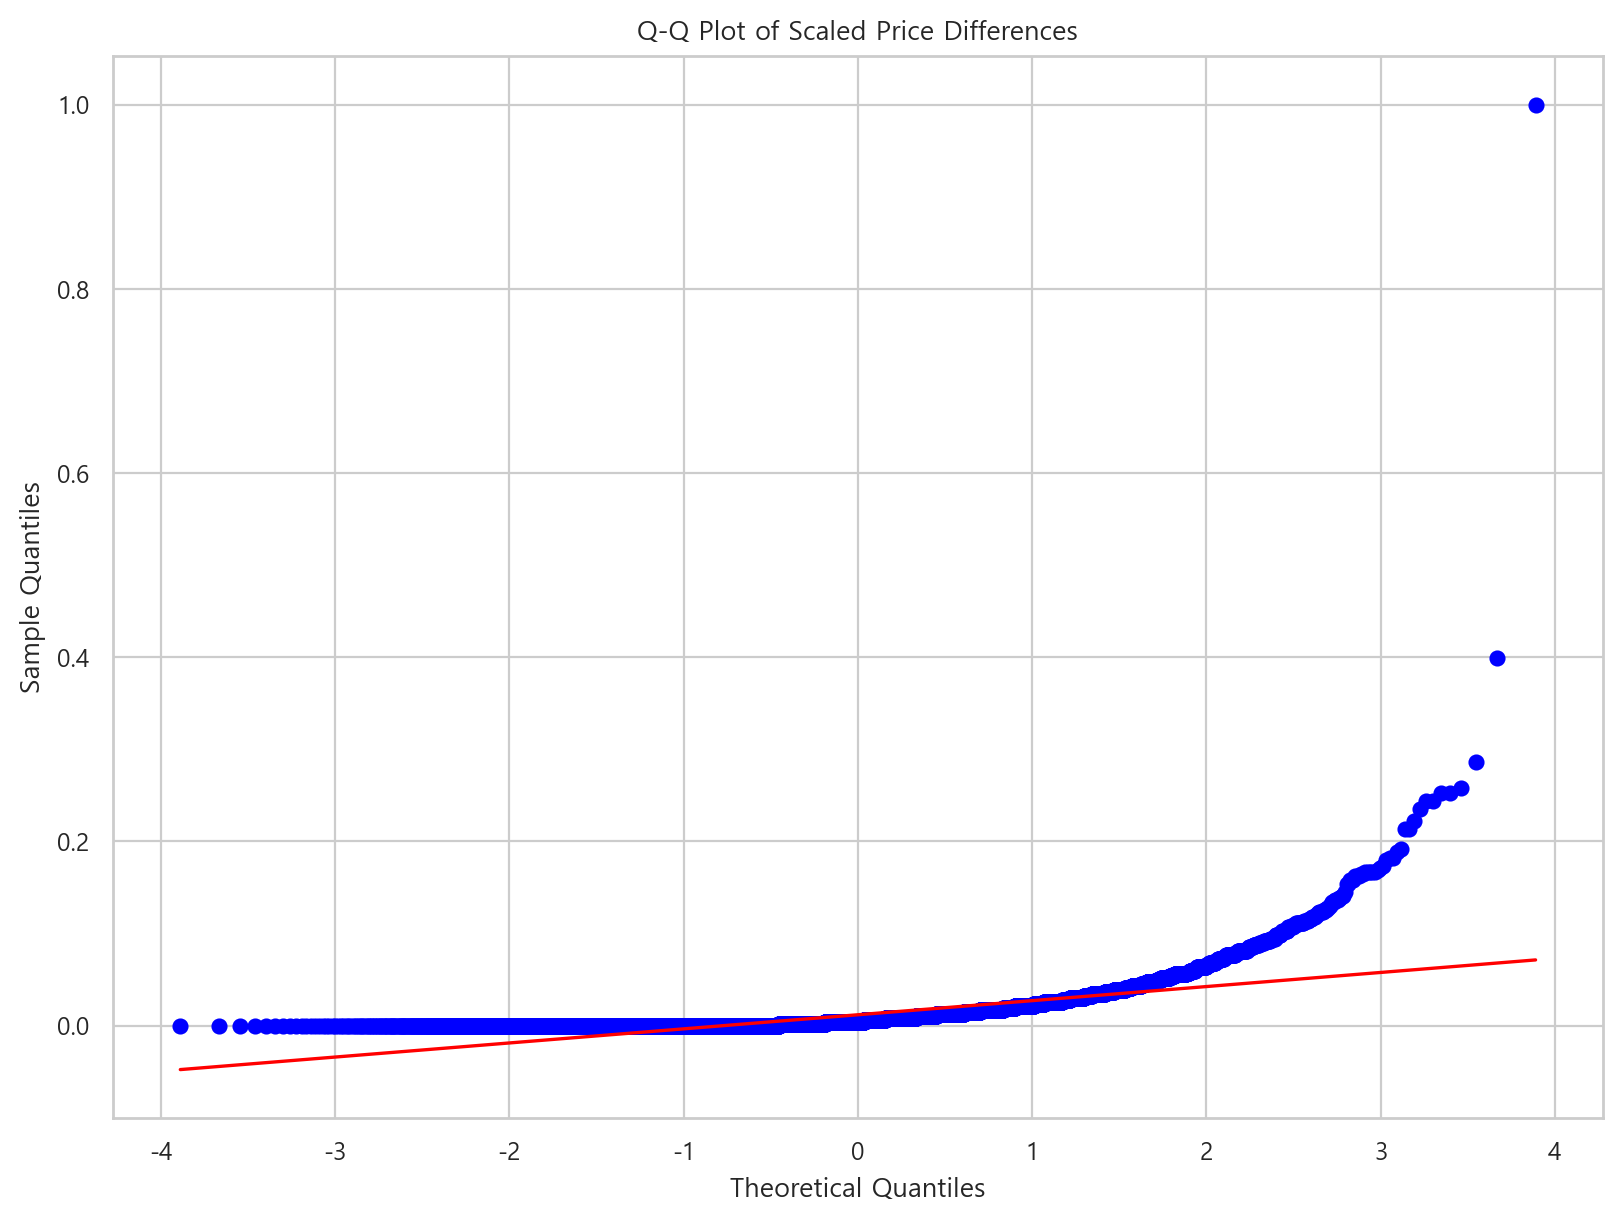

In [68]:
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(merged_df['scaled_price_diff'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Scaled Price Differences')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()